In [66]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
#import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#  Import and read the charity_data.csv.
import pandas as pd 
raw_ibm_df = pd.read_csv("data/WA_Fn-UseC_-HR-Employee-raw_ibm_df.csv")
pd.options.display.max_columns = None
display(raw_ibm_df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [94]:
# checking for null values
raw_ibm_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [41]:
# checking number of uniques values per column
raw_ibm_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [82]:
raw_ibm_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [42]:
# checking data types
raw_ibm_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

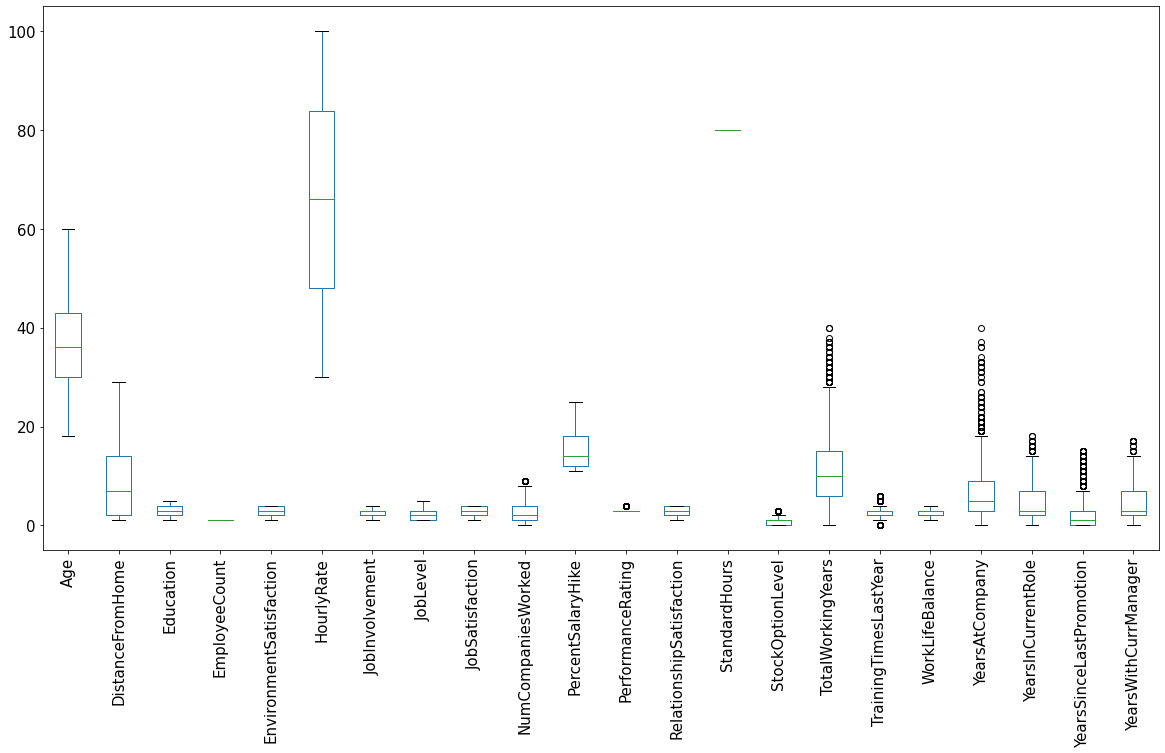

In [61]:
raw_ibm_df.boxplot(column=['Age', 
                            'DistanceFromHome', 
                            'Education', 
                            'EmployeeCount',
                           'EnvironmentSatisfaction', 
                           'HourlyRate',
                           'JobInvolvement', 
                           'JobLevel', 
                           'JobSatisfaction',
                           'NumCompaniesWorked',
                           'PercentSalaryHike', 
                           'PerformanceRating',
                           'RelationshipSatisfaction', 
                           'StandardHours', 
                           'StockOptionLevel',
                           'TotalWorkingYears', 
                           'TrainingTimesLastYear', 
                           'WorkLifeBalance',
                           'YearsAtCompany', 
                           'YearsInCurrentRole', 
                           'YearsSinceLastPromotion',
                           'YearsWithCurrManager'], 
                           figsize=(20, 10), grid=False, rot=90, fontsize=15)


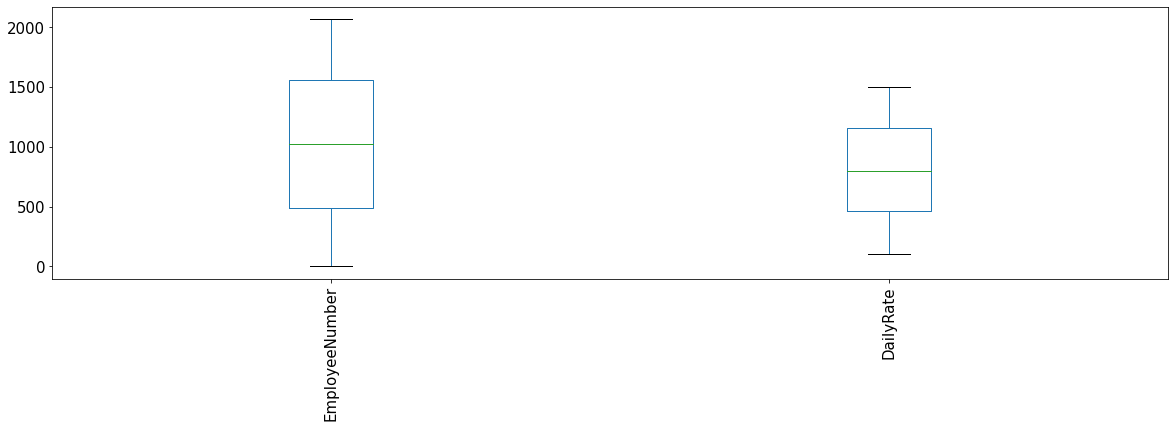

In [62]:
raw_ibm_df.boxplot(column=['EmployeeNumber', 'DailyRate'], figsize=(20,5), grid=False,rot=90, fontsize=15)

c:\Users\dalem\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


TypeError: set_label() got an unexpected keyword argument 'rotation'

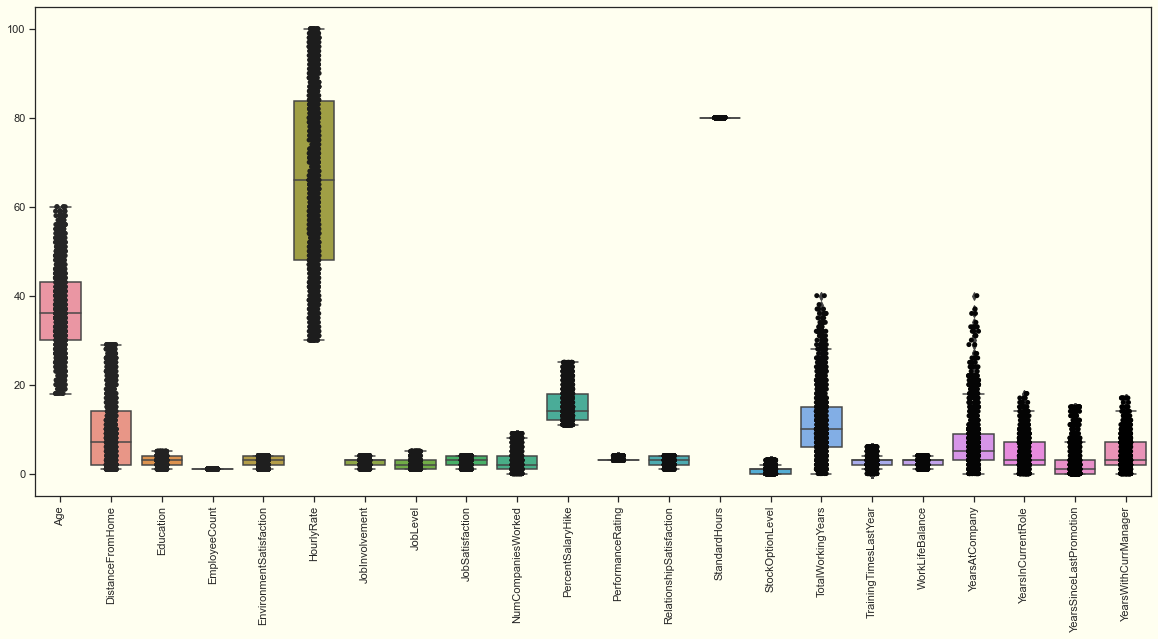

In [170]:
# The box plot
sns.set(
        style="ticks",                   # The 'ticks' style
        rc={"figure.figsize": (20, 9),      # width = 6, height = 9
            "figure.facecolor": "ivory",  # Figure colour
            "axes.facecolor": "ivory"})  # Axes colour
b1 = sns.boxplot(data = raw_ibm_df[['Age', 
                            'DistanceFromHome', 
                            'Education', 
                            'EmployeeCount',
                           'EnvironmentSatisfaction', 
                           'HourlyRate',
                           'JobInvolvement', 
                           'JobLevel', 
                           'JobSatisfaction',
                           'NumCompaniesWorked',
                           'PercentSalaryHike', 
                           'PerformanceRating',
                           'RelationshipSatisfaction', 
                           'StandardHours', 
                           'StockOptionLevel',
                           'TotalWorkingYears', 
                           'TrainingTimesLastYear', 
                           'WorkLifeBalance',
                           'YearsAtCompany', 
                           'YearsInCurrentRole', 
                           'YearsSinceLastPromotion',
                           'YearsWithCurrManager']]) 
b1 = sns.stripplot(data = raw_ibm_df[['Age', 
                            'DistanceFromHome', 
                            'Education', 
                            'EmployeeCount',
                           'EnvironmentSatisfaction', 
                           'HourlyRate',
                           'JobInvolvement', 
                           'JobLevel', 
                           'JobSatisfaction',
                           'NumCompaniesWorked',
                           'PercentSalaryHike', 
                           'PerformanceRating',
                           'RelationshipSatisfaction', 
                           'StandardHours', 
                           'StockOptionLevel',
                           'TotalWorkingYears', 
                           'TrainingTimesLastYear', 
                           'WorkLifeBalance',
                           'YearsAtCompany', 
                           'YearsInCurrentRole', 
                           'YearsSinceLastPromotion',
                           'YearsWithCurrManager']], color = "black")
plt.setp(b1.get_xticklabels(), rotation=90)

# Set the x axis and font size
b1.set_label(raw_ibm_df, rotation=90)
# Set the plot title with the pval variable and font size
b1.set_title("TITLE", fontsize = 16)
# Remove axis spines
sns.despine(offset = 5, trim = True)

b1.get_figure();




c:\Users\dalem\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


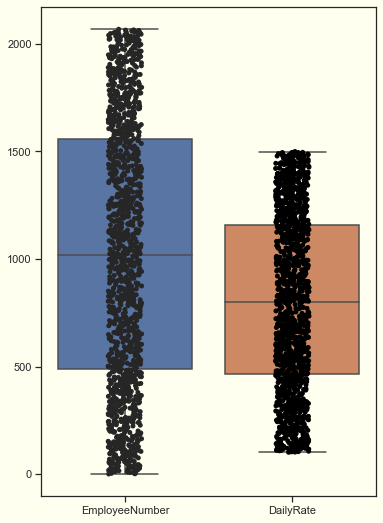

In [121]:
sns.set(
        style="ticks",                   # The 'ticks' style
        rc={"figure.figsize": (6, 9),      # width = 6, height = 9
            "figure.facecolor": "ivory",  # Figure colour
            "axes.facecolor": "ivory"})  # Axes colour
b2 = sns.boxplot(data = raw_ibm_df[['EmployeeNumber', 'DailyRate']])
b2 = sns.stripplot(data = raw_ibm_df[['EmployeeNumber', 'DailyRate']], color = "black")
b2.get_figure();


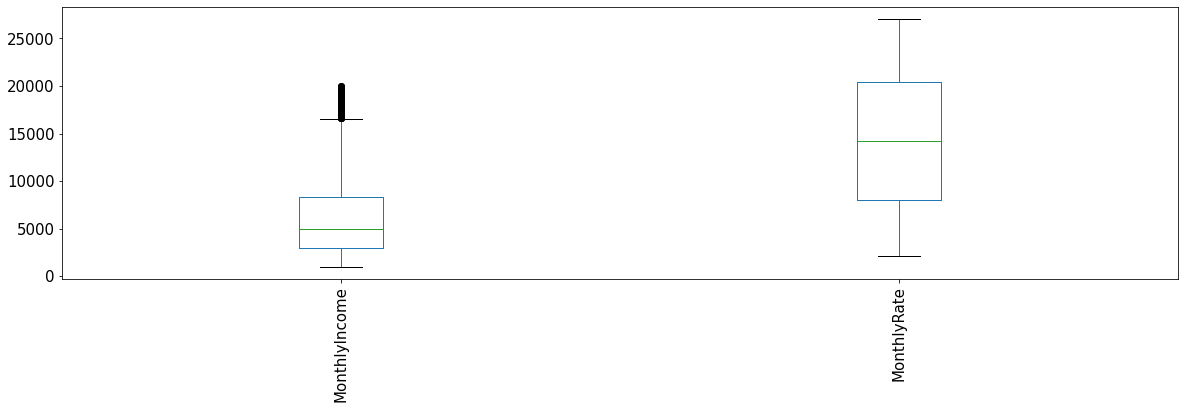

In [63]:
raw_ibm_df.boxplot(column=['MonthlyIncome', 'MonthlyRate'], figsize=(20,5), grid=False,rot=90, fontsize=15)

In [67]:
raw_ibm_df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


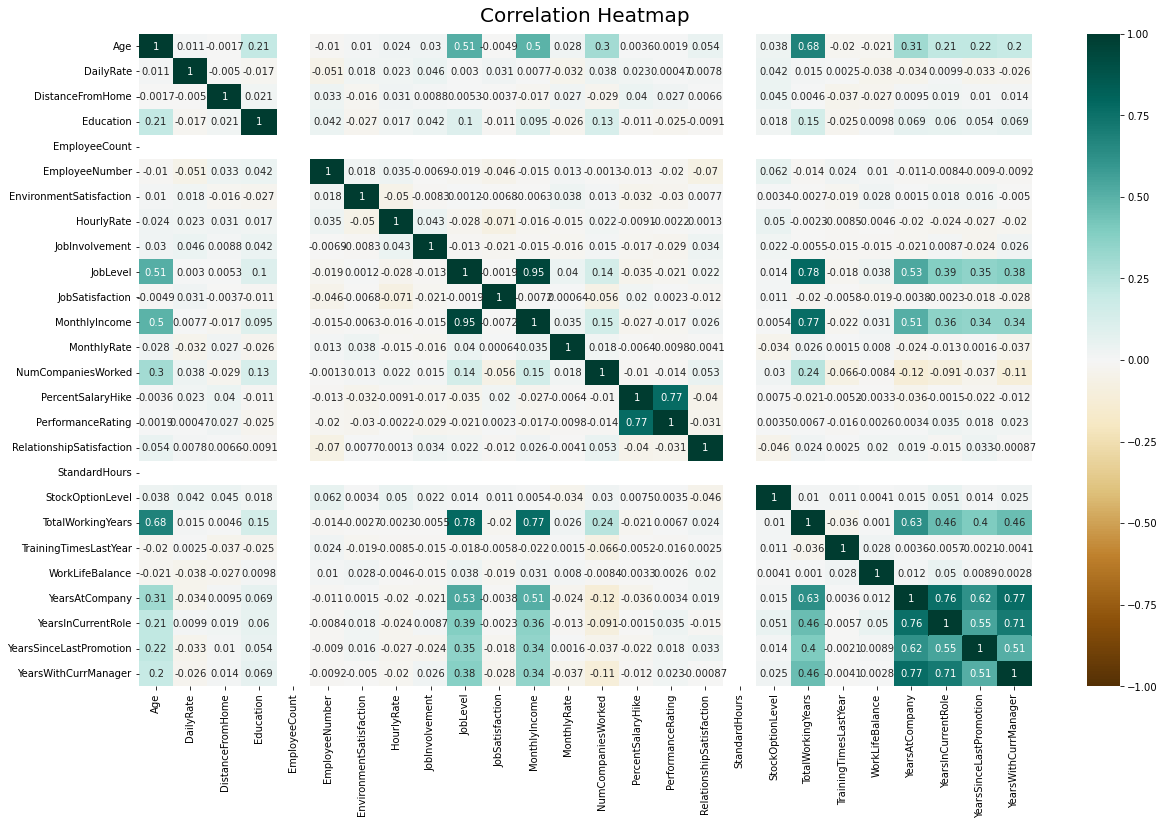

In [81]:

# Increase the size of the heatmap.
plt.figure(figsize=(20, 12))

# Store heatmap object in a variable.
heatmap = sns.heatmap(raw_ibm_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Set the range of values to be displayed on the colormap from -1 to 1, 
# and set the annotation to True to display the correlation values on the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

# save heatmap as .png file
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

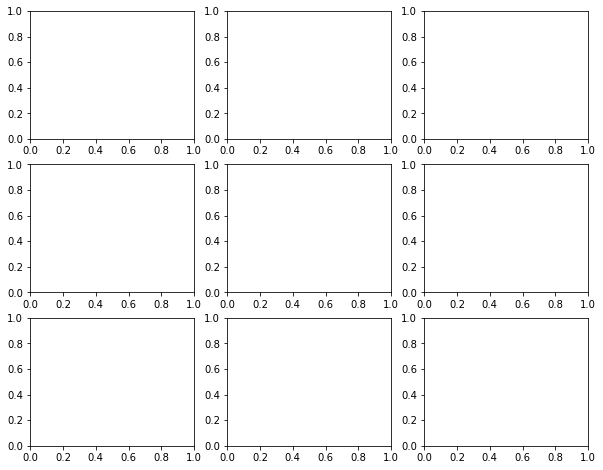

In [97]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = raw_ibm_df['Age'].values
y = raw_ibm_df['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

# cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# # Generate and plot
# x = raw_ibm_df['Age'].values
# y = raw_ibm_df['DailyRate'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
# axes[0,1].set( title = 'Age against Daily Rate')

# cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# # Generate and plot
# x = raw_ibm_df['YearsInCurrentRole'].values
# y = raw_ibm_df['Age'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
# axes[0,2].set( title = 'Years in role against Age')

# cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# # Generate and plot
# x = raw_ibm_df['DailyRate'].values
# y = raw_ibm_df['DistanceFromHome'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
# axes[1,0].set( title = 'Daily Rate against DistancefromHome')

# cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# # Generate and plot
# x = raw_ibm_df['DailyRate'].values
# y = raw_ibm_df['JobSatisfaction'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
# axes[1,1].set( title = 'Daily Rate against Job satisfaction')

# cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# # Generate and plot
# x = raw_ibm_df['YearsAtCompany'].values
# y = raw_ibm_df['JobSatisfaction'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
# axes[1,2].set( title = 'Daily Rate against distance')

# cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# # Generate and plot
# x = raw_ibm_df['YearsAtCompany'].values
# y = raw_ibm_df['DailyRate'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
# axes[2,0].set( title = 'Years at company against Daily Rate')

# cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# # Generate and plot
# x = raw_ibm_df['RelationshipSatisfaction'].values
# y = raw_ibm_df['YearsWithCurrManager'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
# axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

# cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# # Generate and plot
# x = raw_ibm_df['WorkLifeBalance'].values
# y = raw_ibm_df['JobSatisfaction'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
# axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()